![img](img/images.png)

<strong>Gueddari Yasmine <strong>
<H1>Mini Projet "Analyzing-Netflix-Data"<H1>

### Importation de bibliothèques

* Maintenant, nous allons travailler dans Anaconda pour analyser le DataFrame, nous devons d'abord charger les bibliothèques nécessaires.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


* Pandas nous permettent de manipuler le fichier et d'effectuer différentes tâches.
* NumPy nous  permettent d’effectuer des calculs numériques avec Python et elle introduit une gestion facilitée des tableaux de nombres.
* Matplotlib , Os et Seaborn nous permettent de créer des graphiques et de leur donner du style.

### Chargement des données

In [71]:
data = pd.read_csv('Data/netflix_dataset.csv')
#10 premières valeurs
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [73]:
data.shape

(8807, 12)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [75]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [76]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [77]:
#Imprimer le nom des colonnes
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

La base de données se composait de 7787 lignes et 12 colonnes. Les colonnes et leurs descriptions étaient les suivantes :

* show_id : Identifiant unique de chaque émission 

* type : Movie / TV show

* title : Nom du show

* director : Nom du directeur(s)

* CAST : Noms des acteurs/actrices de la série

* country : Pays où l'émission est disponible pour regarder sur Netflix

* date_added : Date à laquelle l'émission a été ajoutée sur Netflix

* rating : Afficher l'évaluation sur netflix

* release_year : Année de sortie du show	

* duration : Durée du show

* listed_in : Genre de l'émission	

* description : Bref aperçu de l'émission



In [78]:
#En triant la valeur "release_year" du moins au plus grand.
data.sort_values(by="release_year",ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


### Data Cleaning

Le processus de Data Cleaning consiste à identifier les données incorrectes, incomplètes, inexactes, non pertinentes ou manquantes, puis à les modifier, les remplacer ou les supprimer si nécessaire.

* Maintenant que nous savons qu'il existe des valeurs NaN, nous pouvons voir la quantité de chacune d'entre elles.

In [28]:
#Vérifier les valeurs NULL
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot: >

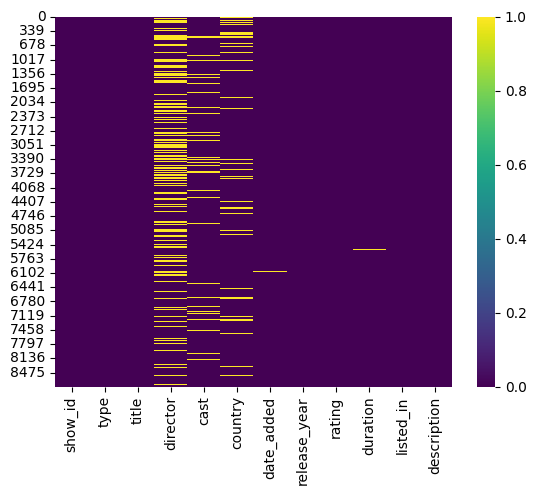

In [15]:
sns.heatmap(data.isnull(),cmap = 'viridis')

=>La colonne avec le plus de valeurs NaN est director, cast et country, nous devons le savoir pour éviter les erreurs.

In [13]:
#Vérifier les valeurs en double
data.duplicated().sum()

0

=>Aucune valeur en double présente.

In [14]:
#Vérifier les valeurs uniques
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

* Convertir "data_added" de chaîne en date et heure

In [84]:
data["date_added"].head(3)

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
Name: date_added, dtype: object

In [148]:
date = data[["date_added"]].dropna()

date['year'] = date["date_added"].apply(lambda i: i.split(', ')[1])
date['month'] = date["date_added"].apply(lambda i: i.lstrip().split(' ')[0])

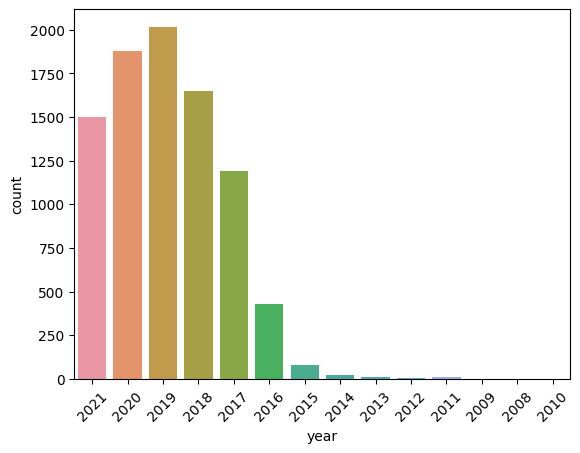

In [86]:
plt.xticks(rotation=45)
sns.countplot(x=date['year'])
plt.show()

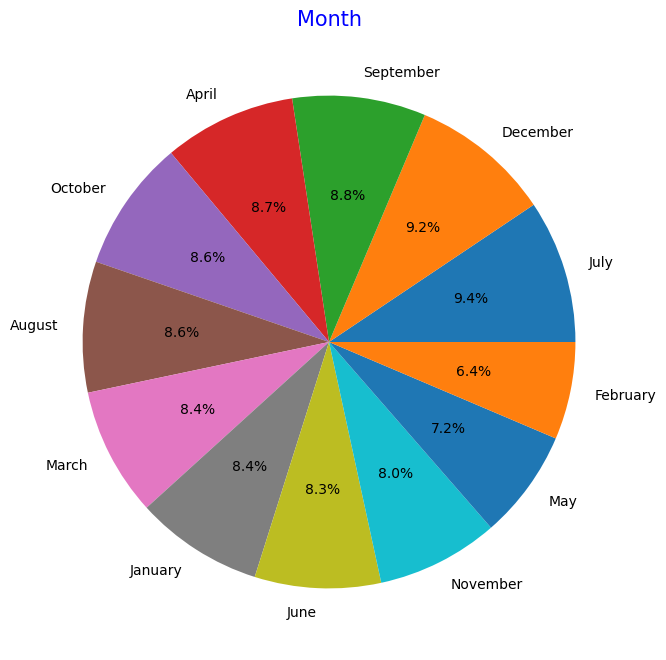

In [88]:
labels = date['month'].value_counts().index
sizes = date['month'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')
plt.title('Month',color = 'Blue',fontsize = 15)
plt.show()


## Question / Objectif
## <strong>Quelle est la variété de l'offre de Netflix ?<strong>

### Etape 1: Quels sont les films ou émissions de télévision les plus courants ?
Pour répondre à cela, nous pouvons faire un graphique où compter les données divisées par ces deux valeurs.

In [25]:
#Show the unique values of the column 'type'
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<AxesSubplot: title={'center': 'Comparision between TV and Movie shows count '}, xlabel='type', ylabel='count'>

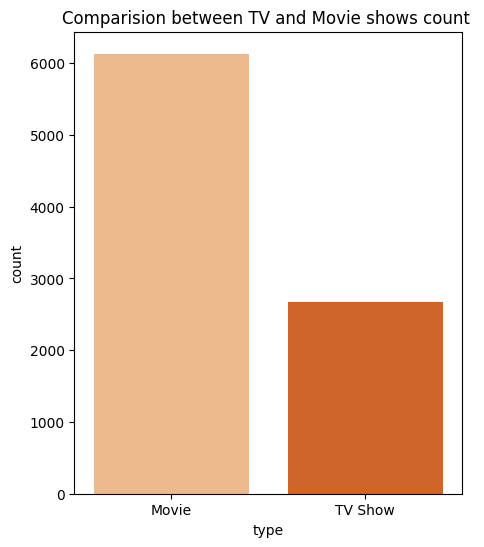

In [89]:
#Plot in the number of moves versus tv series
plt.figure(figsize=(5, 6))
plt.title("Comparision between TV and Movie shows count ")
sns.countplot(x=data['type'], data=data, palette='Oranges')

* Pie-chart for the Type: Movie and TV Shows

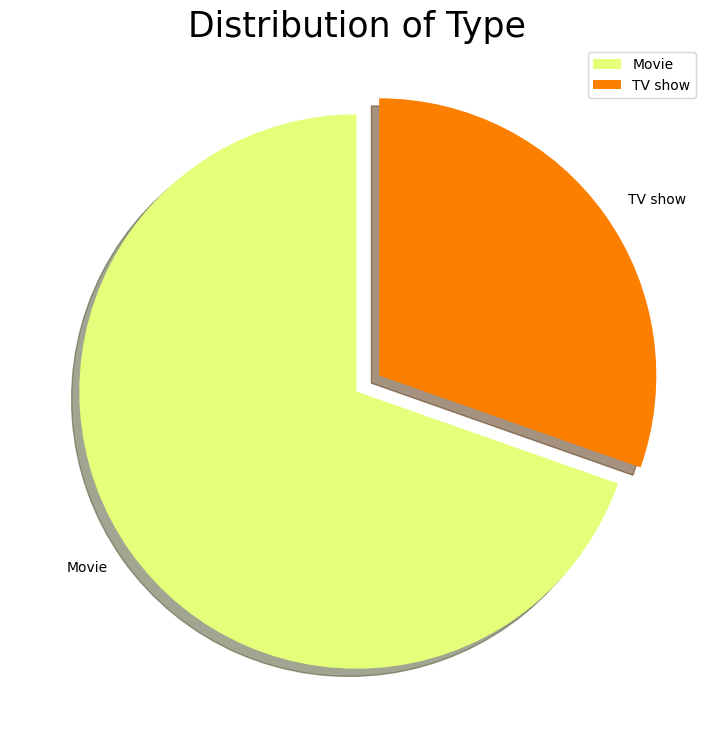

In [34]:
labels = ['Movie', 'TV show']
size = data['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

=> Maintenant, nous pouvons répondre à notre question, les films sont plus courants que les émissions de télévision.

### Etape 2: Quels sont les genres les plus courants dans les films et les émissions de télévision ?
  Pour le savoir, nous devons d'abord diviser toutes les données de la colonne 'listed_in' en les divisant à l'aide de la virgule.

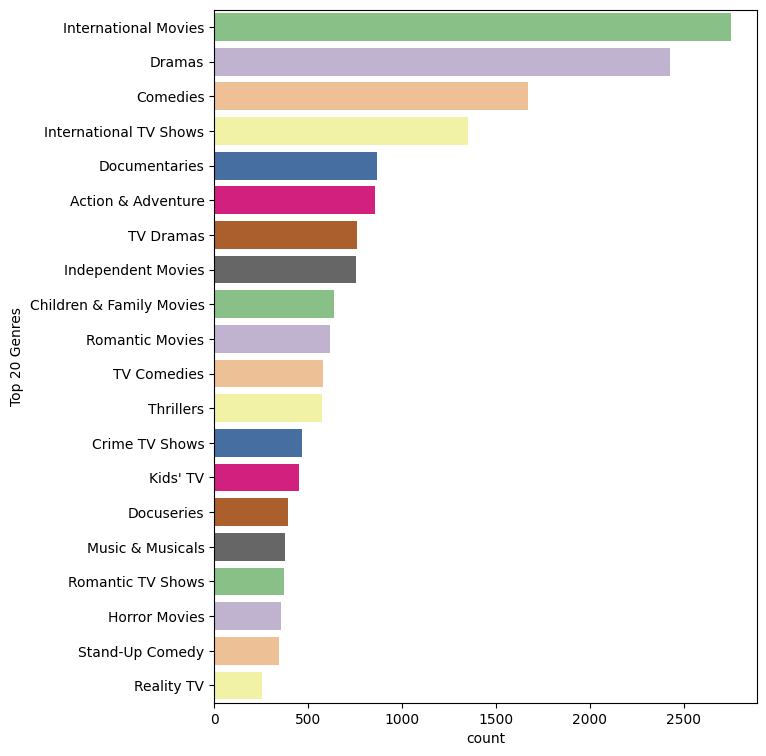

In [90]:
#Extract the genres
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(7,9))
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20],palette=('Accent'))
plt.ylabel('Top 20 Genres')
plt.show()

=> Avec cela, nous pouvons maintenant dire que les 5 meilleurs genres de Netflix sont :
  
  * 1.International Movies
  
  * 2.Dramas
  
  * 3.Comedies
  
  * 4.International TV Shows
  
  * 5.Documentaries

### Etape 3: Quels sont les pays les plus courants dans Netflix ?
  Pour le savoir, nous devons d'abord diviser toutes les données de la colonne 'country' en les divisant à l'aide de la virgule.

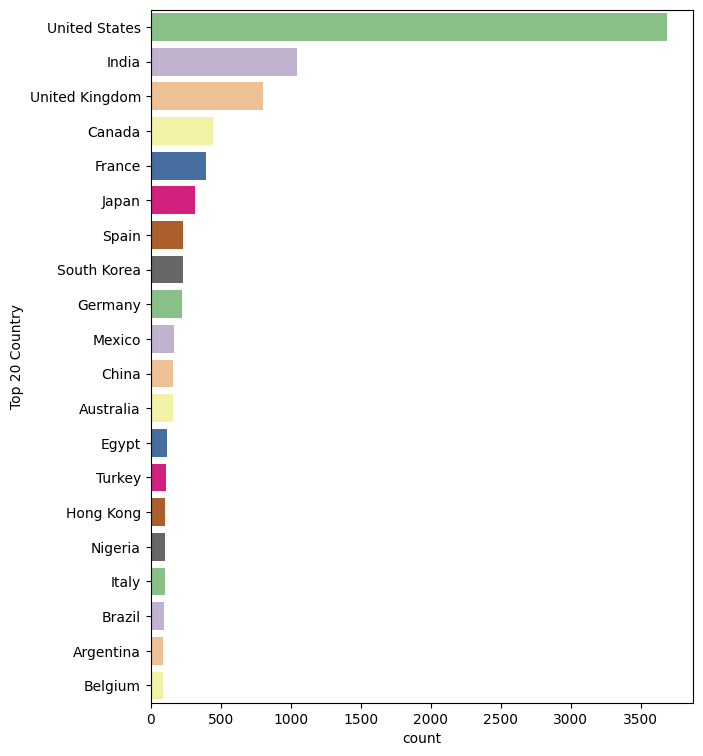

In [91]:
#Extract the pays
filtered_pays = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(7,9))
sns.countplot(y = filtered_pays, order=filtered_pays.value_counts().index[:20],palette=('Accent'))
plt.ylabel('Top 20 Country')
plt.show()

=>La différence entre les États-Unis et les autres pays est très élevée, nous pouvons donc voir quelle est la région la plus importante.


## <strong>Netflik a-t-il investi dans certaines tranches d'âge?<strong>

* Une autre donnée importante est la "rating" qui indique l'âge approprié pour voir le contenu, pour connaître la quantité de contenu par note, nous pouvons faire ce qui suit.

In [63]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

   * 'TV-PG': 'Older Kids'

   * 'TV-MA': 'Adults'
  
   * 'TV-Y7-FV': 'Older Kids'
  
   * 'TV-Y7': 'Older Kids'
  
   * 'TV-14': 'Teens'

   * 'R': 'Adults'
  
   * 'TV-Y': 'Kids'
  
   * 'NR': 'Adults'

   * 'PG-13': 'Teens'

   * 'TV-G': 'Kids'
  
   * 'PG': 'Older Kids'
  
   * 'G': 'Kids'
  
   * 'UR': 'Adults'
  
   * 'NC-17': 'Adults'



<AxesSubplot: xlabel='rating', ylabel='count'>

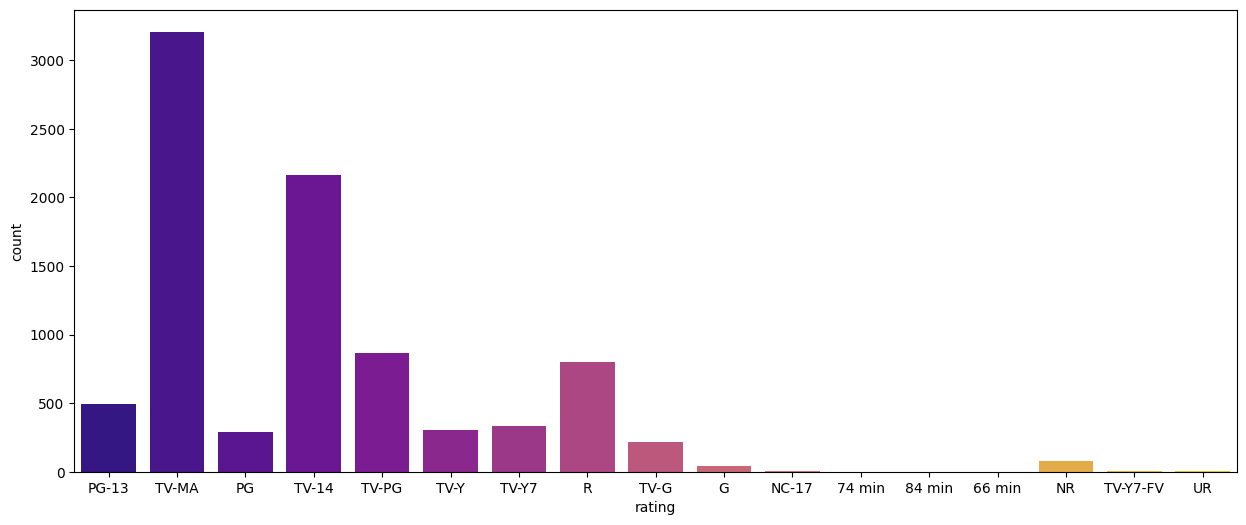

In [92]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['rating'], data=data, palette='plasma')

In [65]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

* Nous pouvons diviser le graphique entre les films et les émissions de télévision:

<AxesSubplot: xlabel='rating', ylabel='count'>

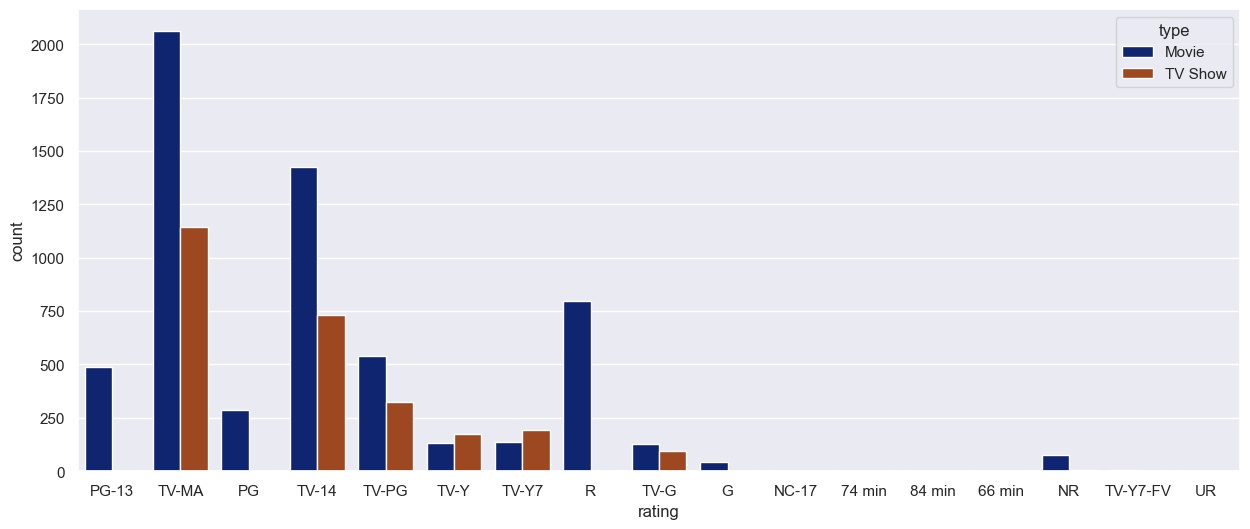

In [143]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['rating'], data=data, palette='dark', hue=data['type'])

* La programmation classée "TV-MA" aux États-Unis par les TV Parental Guidelines signifie un contenu pour un public adulte. Il correspond à la cote R du MPA. Les programmes avec cette cote ne conviennent généralement pas aux enfants ou aux personnes de moins de 17 ans (certaines sources peuvent dire 18). Ce contenu est uniquement destiné à un public adulte, car il contient des thèmes matures, tels que le gore, la violence sexuelle, le langage grossier, la nudité, les substances, le tabagisme et le sexe.
  
* La programmation classée "TV-PG" comme indiqué dans les directives parentales TV des États-Unis signifie un contenu avec une surveillance parentale suggérée. Il correspond à la cote PG de la MPA. Le contenu peut contenir un langage peu fréquent et/ou doux, peu de contenu et/ou de références à caractère sexuel, une violence modérée et/ou des thèmes suggestifs, des dialogues et du contenu sexuel/de la nudité partielle, ce qui peut ne pas convenir aux jeunes enfants sans surveillance parentale.

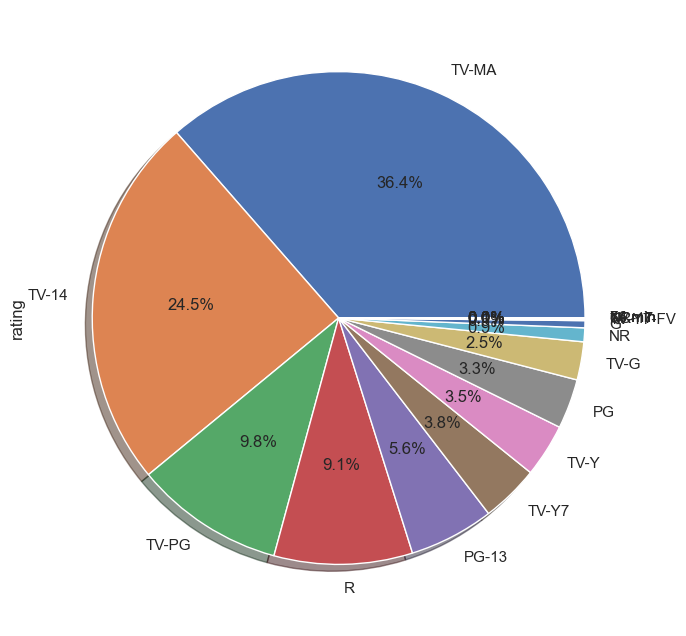

In [147]:
data['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(8,8))
plt.show()

=>Ce n'est que dans la «classification» que TV-Y et TV-Y7 sont plus courantes dans les séries télévisées que dans les films.


## <strong>Netflix a-t-il fait plus d'investissements au cours des dernières années?<strong>

<AxesSubplot: xlabel='year', ylabel='count'>

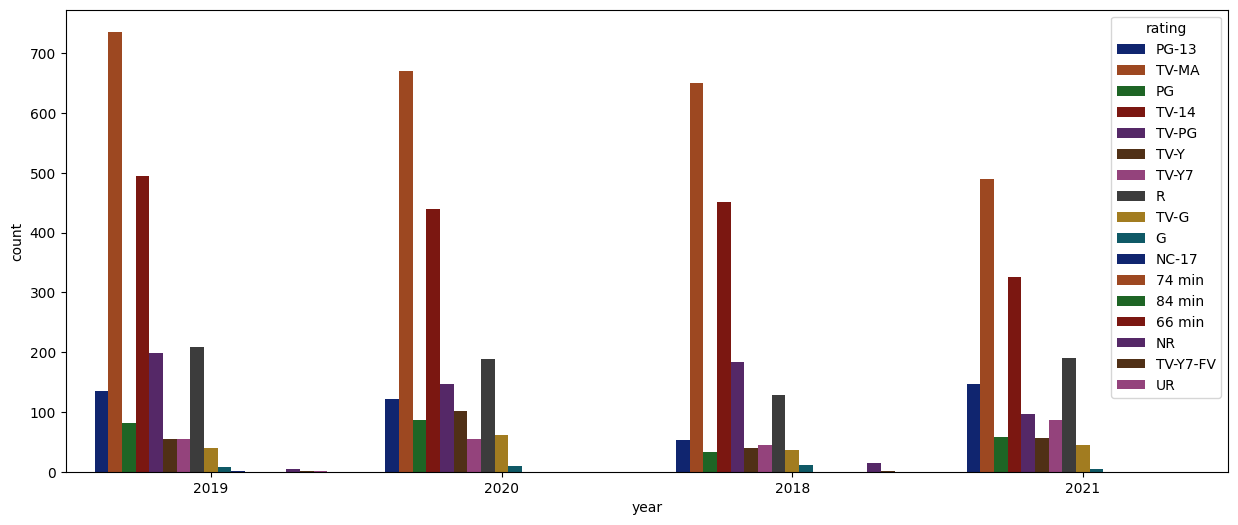

In [109]:
plt.figure(figsize=(15, 6))
date = data[["date_added"]].dropna()
date['year'] = date["date_added"].apply(lambda i: i.split(', ')[1])
yasmine = data['rating'].value_counts().index[0:4]
sns.countplot(x=date['year'], order=date['year'].value_counts().index[0:4], data=data, palette='dark', hue=data['rating'])

<AxesSubplot: xlabel='year', ylabel='count'>

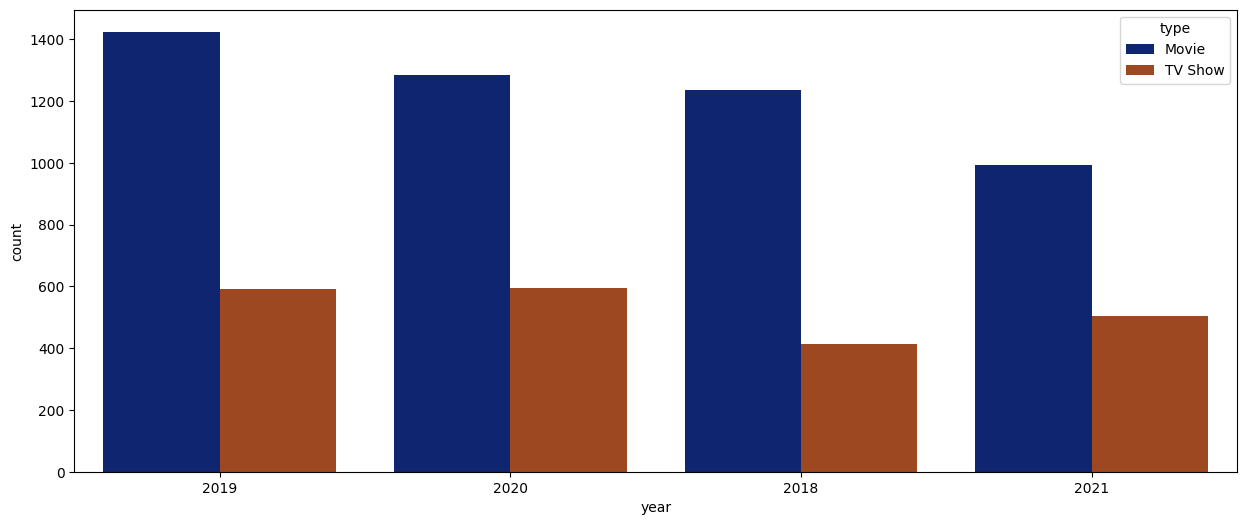

In [17]:
plt.figure(figsize=(15, 6))
date = data[["date_added"]].dropna()
date['year'] = date["date_added"].apply(lambda i: i.split(', ')[1])
sns.countplot(x=date['year'], order=date['year'].value_counts().index[0:5], data=data, palette='dark', hue=data['type'])

=> Il y a eu une augmentation constante de la production de contenu au fil des ans jusqu'en 2019 environ, lorsque le contenu a chuté. Cela pourrait être attribué à la pandémie de COVID-19 qui a particulièrement frappé l'industrie du divertissement pendant cette période.

### Nous allons maintenant diviser les données entre le film et l'émission de télévision.

In [98]:
#Extraire uniquement les films
data_movie = data[data['type'] == 'Movie']
data_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [99]:
#Compter tous les films pour chaque réalisateur
data_director = data_movie["director"].value_counts()[1:]
data_director

Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
Cathy Garcia-Molina           13
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: director, Length: 4353, dtype: int64

In [111]:
#Extraire une série, besoin de transformer en DataFrame
type(data_director)

pandas.core.series.Series

In [113]:
#Transformer la série en dataframe
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,director
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13


* Voici les réalisateurs les plus courants pour les films et le nombre de films réalisés par chacun, ces données peuvent être représentées graphiquement.

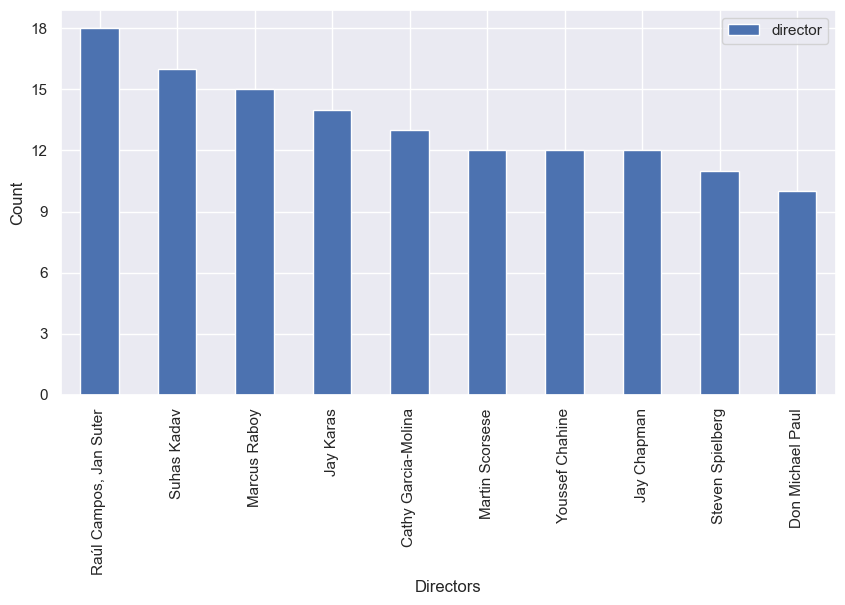

In [122]:
#Maintenant, nous pouvons tracer tous les 10 meilleurs réalisateurs
data_directorFrame[:10].plot(kind='bar', figsize=[10,5])
plt.ylabel('Count')
plt.xlabel('Directors')
plt.yticks([0,3,6,9,12,15,18])
plt.show()

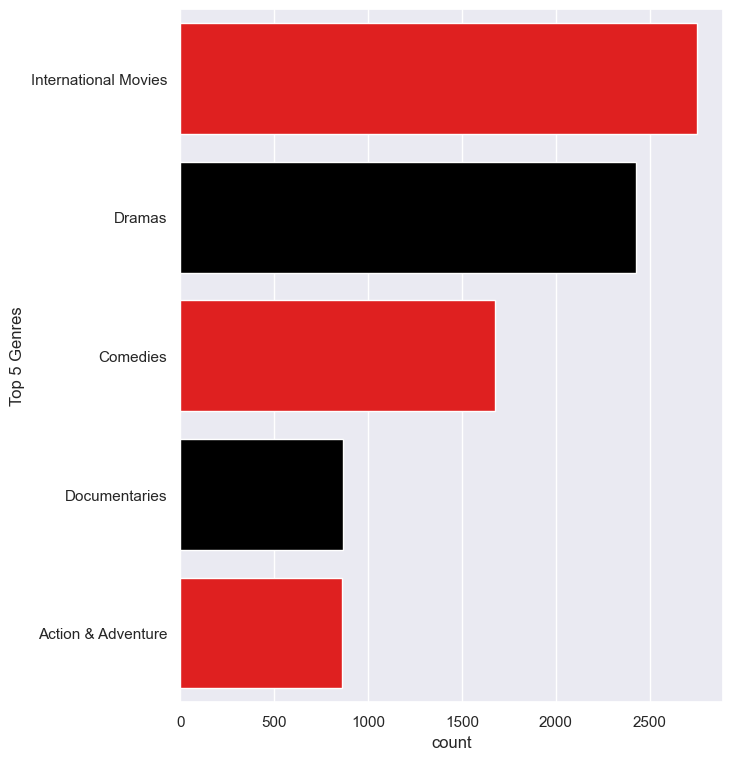

In [128]:
#Genres les plus courants par film
filtered_genres_movies = data_movie.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(7,9))
sns.countplot(y = filtered_genres_movies, order=filtered_genres_movies.value_counts().index[:5],palette=('Red','Black'))
plt.ylabel('Top 5 Genres')
plt.show()

In [123]:
# Genre le plus courant par série télévisée
# Extraire uniquement les films
data_show = data[data['type'] == 'TV Show']
data_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [124]:
data_director_serie = data_show["director"].value_counts()[1:]
data_director_serieF = pd.DataFrame(data_director_serie)
data_director_serieF.head()

,director
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2
Ken Burns,2


* Tout d'abord, transformez les données en Data Frame pandas, après cela, ne tracez que les 30 premiers réalisateurs. Maintenant, nous allons faire la même chose avec la série télévisée.

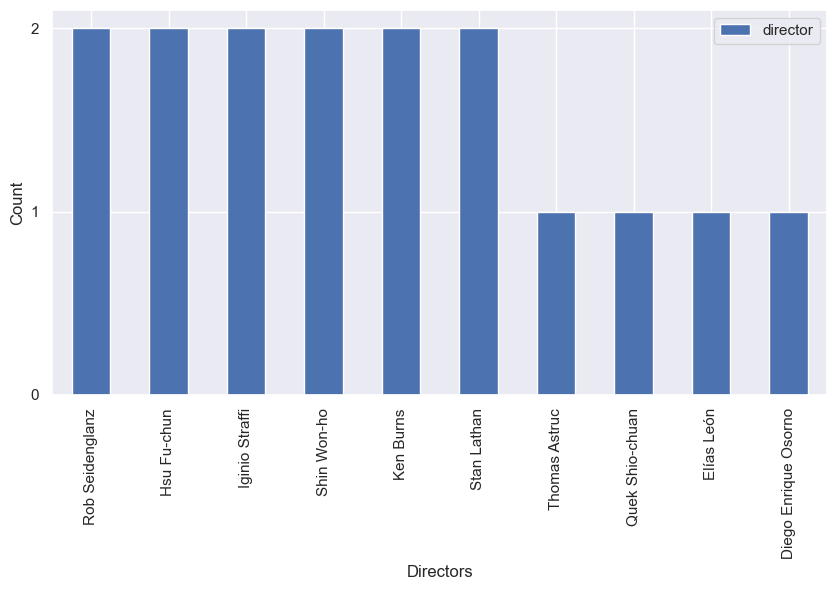

In [125]:
#Voir la différence entre les émissions de télévision par réalisateur 
data_director_serieF[:10].plot(kind='bar', figsize=[10,5])
plt.ylabel('Count')
plt.xlabel('Directors')
plt.yticks([0,1,2])
plt.show()

## Temps entre la sortie du film/émission et la sortie de Netflix

Text(0, 0.5, 'Year added')

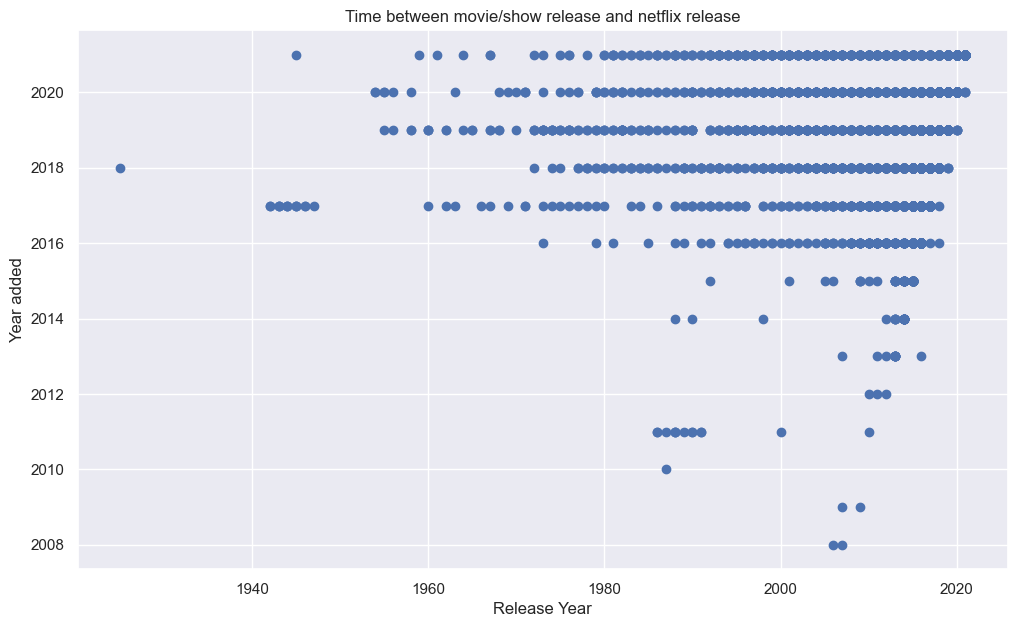

In [135]:
x=data["release_year"]
data['year_added'] = pd.DatetimeIndex(data['date_added']).year
y=data["year_added"]
plt.figure(figsize=(12,7))
plt.scatter(x,y)
plt.title("Time between movie/show release and netflix release")
plt.xlabel("Release Year")
plt.ylabel("Year added")

=>Comme nous pouvons le voir, il y a un écart de temps avant 2008. Tous les films avant 2008 n'ont pas été ajoutés avant 2008

# Conclusion

<h5>Dans Netflix, les films sont le type le plus important parmi les émissions de télévision, deux fois plus de films que de séries télévisées sont développés et cela peut affecter le classement.Le plus grand nombre de contenus Netflix est réalisé avec une classification « TV-MA ». Il y a eu une augmentation constante de la production de contenu au fil des ans jusqu'en 2019 environ, lorsque le contenu a chuté. Cela pourrait être attribué à la pandémie de COVID-19 qui a particulièrement frappé l'industrie du divertissement pendant cette période. Une autre information importante est que la différence entre le nombre de projets par les réalisateurs de films par rapport aux séries télévisées est très grande, cela peut être dû au fait que la réalisation d'une série télévisée nécessite plus de temps et de travail. Enfin, les États-Unis sont le pays le plus important pour créer du contenu pour Netflix<h5>